# Song Popularity EDA


## 1. Introduction

Welcome to a new and exciting Kaggle community competition!

This competition is about analyzing the popularity of songs based on a set of features.

It is a great opportunity to get a better understanding of the data and to learn how to use the data to
make predictions. Hence it is targeted at beginners.

This is a classification challenge, with the evaluation metric being the [AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

The data consistsof the standard Kaggle `train.csv` and `test.csv`, along with `sample_submission.csv`, to show how
the structure of the submission file should be.

This notebook is a python representation of the R EDA notebook by Heads Or Tails from this live stream [here](https://www.youtube.com/watch?v=JXF-7rCcR1c)


## 2. Preparations

We load a range of libraries, set the working directory and load the data.


In [1]:
from pathlib import Path
from warnings import filterwarnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

In [3]:
if Path("../kaggle").exists():
    path: str = "../kaggle/input/song-popularity-prediction"
else:
    path: str = "../input/"


In [4]:
train: pd.DataFrame = pd.read_csv(path + "/train.csv")
test: pd.DataFrame = pd.read_csv(path + "/test.csv")
sample_submission: pd.DataFrame = pd.read_csv(path + "/sample_submission.csv")


## 3. Overview: structure and data content

The first thing you want to do is to look at your actual data in its raw form. This will tell you about the types of
features you will be dealing with (numerical, categorical, string, etc.), as well as already reveal some characteristics
of the dataset. This includes checking for missing values.

Generally, we don't want to look at the test data any more than strictly necessary. The test dataset is intended to
serve as our final model validation, and should only include data that the model has never seen before. Since our
brain is a part of the modelling process as well (os lease it should be), we want to avoid picking up any signal
in the test data that could consciously or unconsciously influence our decision. Thus, this EDA will almost entirely
focus on the `train.csv` data.


### 3.1 A look at the data


In [5]:
train.head()


,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


We find:

- With 15 columns and 40k rows, this is relatively small dataset. The dataset is small enough to explore in its
  entirety, without having to select subsets for reasons of speed.
- There is an `id` column which appears to be sequentially numbered rows. This can be directly used as index columns
  for the dataframe.
- There are no string columns in the dataset (or otherwise complex columns). All of the features can be expressed
  numericqally. Our target `song_popularity` appears to be binary; probably `audio_mode` as well. The features `key`
  and `time_signatures` look like categorical or ordinal variables.
- We can immediately see some missing values in the data. This is something we need to keep in mind in future
  exploratory and modelling steps.

Let's look at a larger subset of data in the tabular format


In [7]:
train.sample(50)


,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
32057,32057,214487.0,0.834985,0.724262,0.426226,0.001895,1.0,0.097714,NaN,0,0.038502,80.808998,3,0.376431,0
38446,38446,71718.0,0.998395,0.320883,0.215439,0.005895,2.0,0.122981,-11.436638,0,0.038570,82.379575,2,0.147666,0
12220,12220,208209.0,0.054483,NaN,0.840307,0.000754,6.0,0.635901,-4.485119,0,0.045352,173.034434,3,0.537661,0
15081,15081,141720.0,0.155545,0.757291,0.479609,0.004117,10.0,0.094742,-13.881425,1,0.091594,145.256367,4,0.303595,1
37863,37863,161391.0,0.008775,0.894569,0.761712,NaN,NaN,0.607292,-3.944506,0,0.025653,103.012618,3,0.783810,0
39506,39506,215200.0,0.006921,NaN,0.884928,-0.000119,5.0,0.124792,-4.375822,1,0.064165,124.831126,4,0.142461,1
7119,7119,284583.0,0.018473,0.437606,0.589604,0.000382,10.0,0.378148,-4.421564,0,0.226894,95.460858,4,0.269030,1
19194,19194,175647.0,0.017984,0.430433,0.919488,0.002590,8.0,0.131691,-3.385461,0,0.038132,126.799234,3,0.700475,1
25384,25384,173657.0,0.599475,0.355299,0.719825,0.001778,3.0,NaN,-3.249118,0,0.117942,115.954002,3,0.835912,0
7881,7881,195742.0,0.013746,NaN,0.826793,0.002739,6.0,0.114492,-10.668668,0,0.029505,86.153927,4,0.162429,0


We find:

- Using `sample()`, we get random rows of data, which may be beneficial to avoid any kind of rows that might have
  been changed.
- The 50 rows that `sample()` returned confirms most of our impressions.
- There are plenty of missing values (encoded as `NA`) in several of the columns.
- It is also apparent the different scales of the data. Some features have values around 0.5, while others fo down to
  1e-6 or up to almost 200.


### 3.2. Missing values


Let's take a closer look at the missing values.


In [8]:
print(
    f"The training set has {train.isnull().sum().sum()} missing values, the test set has {test.isnull().sum().sum()}."
)


The training set has 32187 missing values, the test set has 7962.


We can also visualise the values to give us an overview of the entire dataset.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'id'),
  Text(0, 1, 'song_duration_ms'),
  Text(0, 2, 'acousticness'),
  Text(0, 3, 'danceability'),
  Text(0, 4, 'energy'),
  Text(0, 5, 'instrumentalness'),
  Text(0, 6, 'key'),
  Text(0, 7, 'liveness'),
  Text(0, 8, 'loudness'),
  Text(0, 9, 'audio_mode'),
  Text(0, 10, 'speechiness'),
  Text(0, 11, 'tempo'),
  Text(0, 12, 'time_signature'),
  Text(0, 13, 'audio_valence'),
  Text(0, 14, 'song_popularity')])

<Figure size 1440x1152 with 0 Axes>

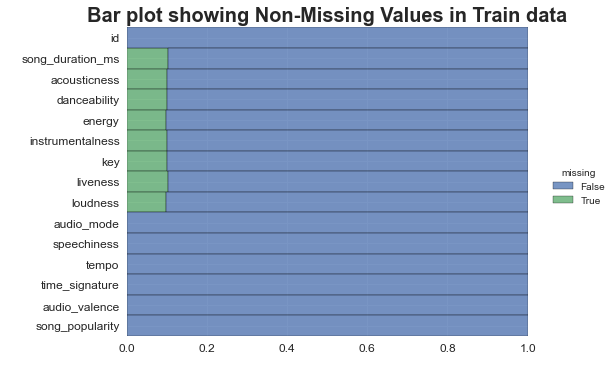

In [9]:
plt.figure(figsize=(20, 16))
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5,
)
plt.title("Bar plot showing Non-Missing Values in Train data", size=20, weight="bold")
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size=12)
plt.yticks(size=12)


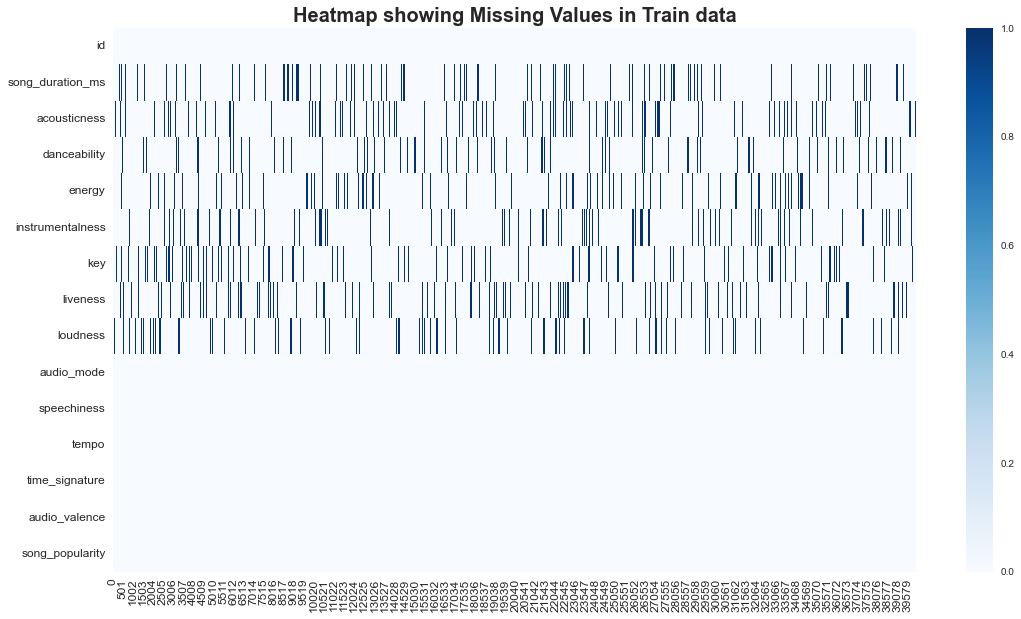

In [10]:
plt.figure(figsize=(18, 10))
sns.heatmap(train.isna().transpose(), yticklabels=True, cmap="Blues")
plt.title("Heatmap showing Missing Values in Train data", weight="bold", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


While we’re at it, we also make this the only plot in this notebook where we add test data information. You want to touch the test data as little as possible, but when it comes to missing values it’s worth a check to see whether the train or test distributions differ. (Or you could also train an adverserial model to see if you can get it to distinguish between train vs test on the basis of the feature values alone. If so, then at least some of the feature distributions will likely be different.)

For our plot, we will remove both id and song_popularity since they don’t have missing values (and id is just the row index):


In [11]:
ncounts = pd.DataFrame(data=[train.isna().mean(), test.isna().mean()]).transpose()
ncounts.columns = ["train", "test"]
ncounts


,train,test
id,0.000000,0.0000
song_duration_ms,0.102525,0.0957
acousticness,0.099800,0.0950
danceability,0.100650,0.0976
energy,0.099375,0.1055
instrumentalness,0.099625,0.1000
key,0.101625,0.0992
liveness,0.102150,0.1006
loudness,0.098925,0.1026
audio_mode,0.000000,0.0000


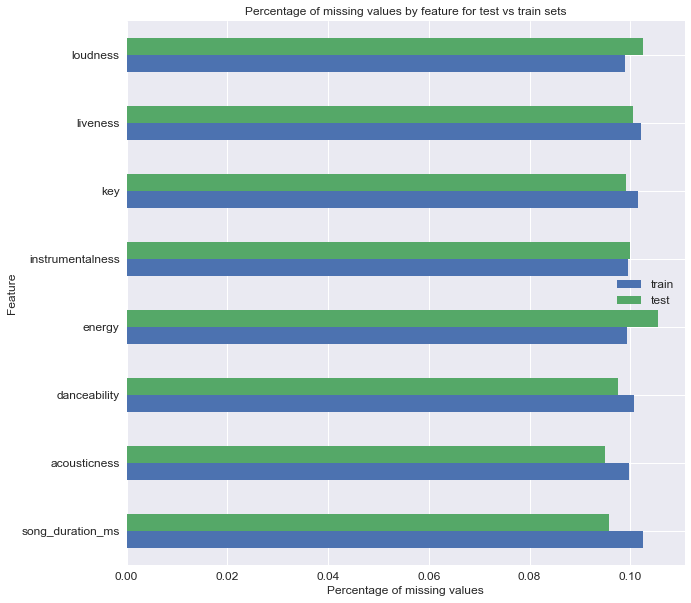

In [12]:
ncounts.query("train > 0").plot(
    kind="barh",
    figsize=(10, 10),
    title="Percentage of missing values by feature for test vs train sets",
    fontsize=12,
)
plt.xlabel("Percentage of missing values", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.legend(fontsize=12, loc="center right")
plt.show()


We find:

- We’re missing 5% of all values. That’s a sizeable portion. Not enough to make an analysis futile, of course, but
  sufficient to make us pay closer attention to what is going on here.
- Not all features have missing values, though. We find them only in the first 8 columns (not counting the id). Consequently, those columns have around 10% missing values.
- There are some slight differences in the train vs test percentages of missing values for most features.


### 3.3 Feature Transformation


This is slightly non-linear step when it comes to the evolution of the notebook. As we confirm our initial impression
of certain feature columns in the following visualisation step, we go back here and modify those data types globally
so that we don't have to write the transformations every time.

Specifically, we will be turning the features `key` and `time_signatures` into categorical variables, and
`song_popularity` and `audio_mode` to boolean variables.

`key` already seems to be in categorical format, so we will not transform it.


In [13]:
train["time_signature"] = train["time_signature"].astype("category")
train = train.astype({"song_popularity": bool, "audio_mode": bool})


In [14]:
train.dtypes


id                     int64
song_duration_ms     float64
acousticness         float64
danceability         float64
energy               float64
instrumentalness     float64
key                  float64
liveness             float64
loudness             float64
audio_mode              bool
speechiness          float64
tempo                float64
time_signature      category
audio_valence        float64
song_popularity         bool
dtype: object

## 4. Visualisation - Individual features


After getting an initial idea about our features and their values, we can now dive into the visual part of the
exploration. **It is recommended to always plot your data**. Sometimes this might be challenging, e.g. because you
have tones of features. In that case, you want to start at lease with a subset before you run any dimensionality
reduction or other tools. This step is as much about spotting issues and irregularities as it is about learning more
about the shapes and distributions of your features.

We start by looking at the individual distributions for each predictor feature; a luxury we can afford with such a
relatively small dataset. Then we will also examine the target distribution.


### 4.1 Predictive features


It really pays off to take the time and investigate each feature separately. This is one of the most instructive
steps in the EDA process, where you aim to learn how messed up your features are. No dataset is perfect. We want to
figure out how severe those imperfections are, and whether we can live with them or have to address them.

Different kind of data types go best with different kind of visuals. We can start with density plots or histograms
for numerical features, and with bar charts for those that are better suited to categorical features.


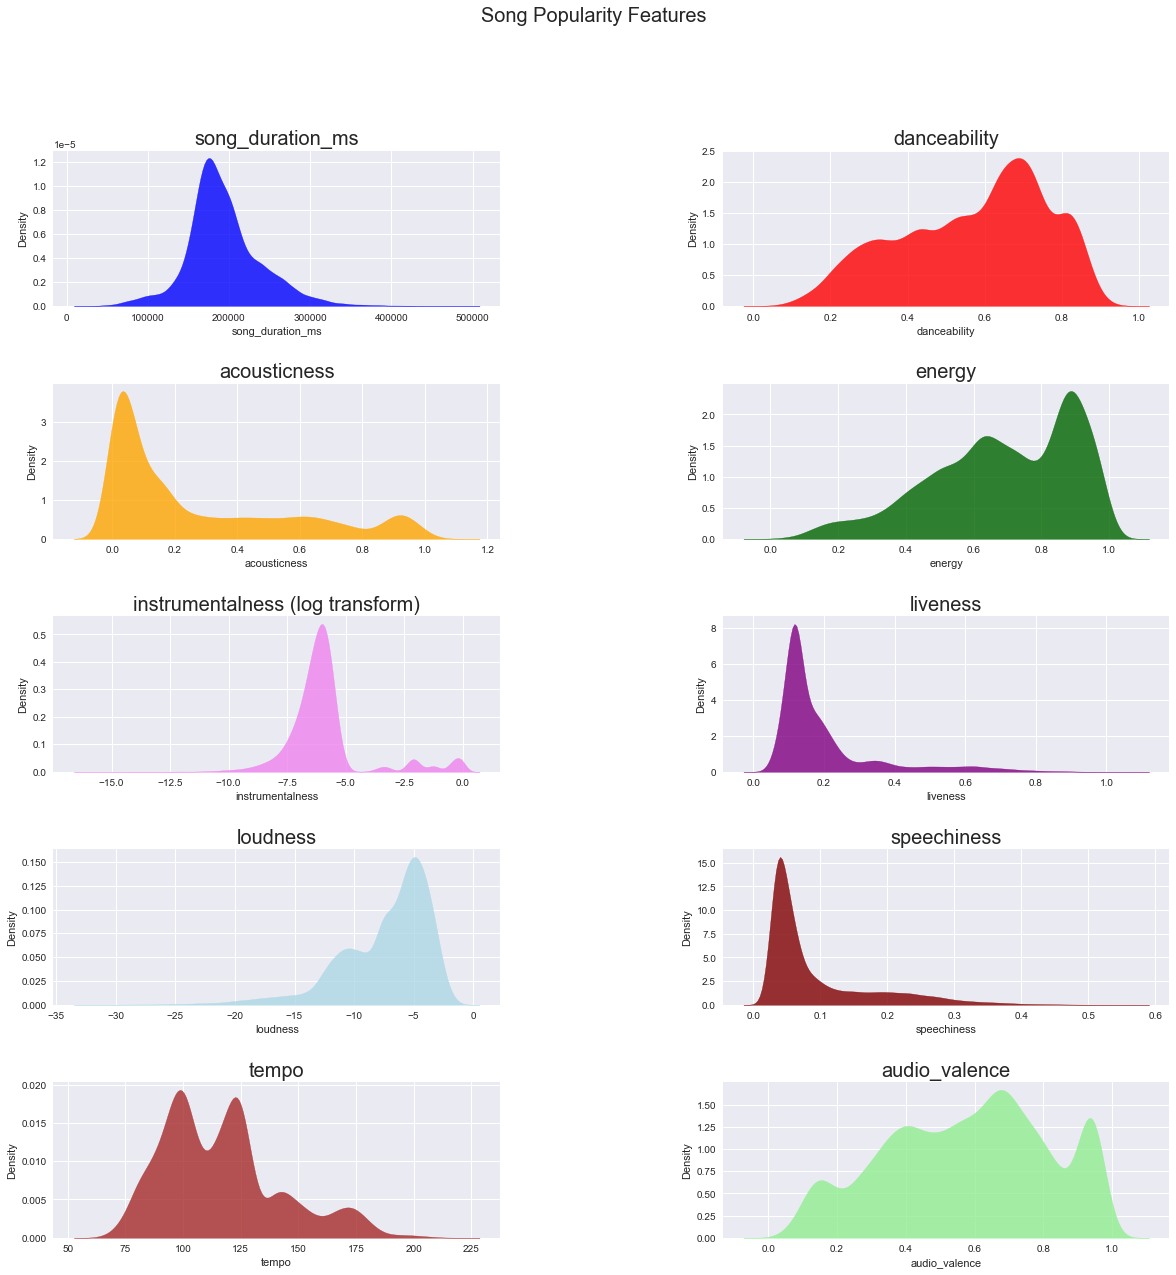

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
fig.suptitle("Song Popularity Features", size=20)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

axes[0, 0].set_title("song_duration_ms", size=20)
sns.kdeplot(ax=axes[0,0], data=train["song_duration_ms"].dropna(), label="song_duration_ms", color="blue", fill=True, alpha=0.8)

axes[1, 0].set_title("acousticness", size=20)
sns.kdeplot(ax=axes[1, 0], data=train["acousticness"].dropna(), label="acousticness", color="orange", fill=True, alpha=0.8)

axes[0,1].set_title("danceability", size=20)
sns.kdeplot(ax=axes[0,1], data=train["danceability"].dropna(), label="danceability", color="red", fill=True, alpha=0.8)

axes[1, 1].set_title("energy", size=20)
sns.kdeplot(ax=axes[1,1], data=train["energy"].dropna(), label="energy", color="darkgreen", fill=True, alpha=0.8)

axes[2, 0].set_title("instrumentalness (log transform)", size=20)
sns.kdeplot(ax=axes[2,0], data=np.log(train["instrumentalness"].dropna()), label="instrumentalness", color="violet", fill=True, alpha=0.8)

axes[2, 1].set_title("liveness", size=20)
sns.kdeplot(ax=axes[2,1], data=train["liveness"].dropna(), label="liveness", color="purple", fill=True, alpha=0.8)

axes[3, 0].set_title("loudness", size=20)
sns.kdeplot(ax=axes[3, 0], data=train["loudness"].dropna(), label="loudness", color="lightblue", fill=True, alpha=0.8)

axes[3, 1].set_title("speechiness", size=20)
sns.kdeplot(ax=axes[3, 1], data=train["speechiness"].dropna(), label="speechiness", color="maroon", fill=True, alpha=0.8)

axes[4, 0].set_title("tempo", size=20)
sns.kdeplot(ax=axes[4, 0], data=train["tempo"].dropna(), label="tempo", color="brown", fill=True, alpha=0.8)

axes[4, 1].set_title("audio_valence", size=20)
sns.kdeplot(ax=axes[4, 1], data=train["audio_valence"].dropna(), label="audio_valence", color="lightgreen", fill=True, alpha=0.8)

plt.show();

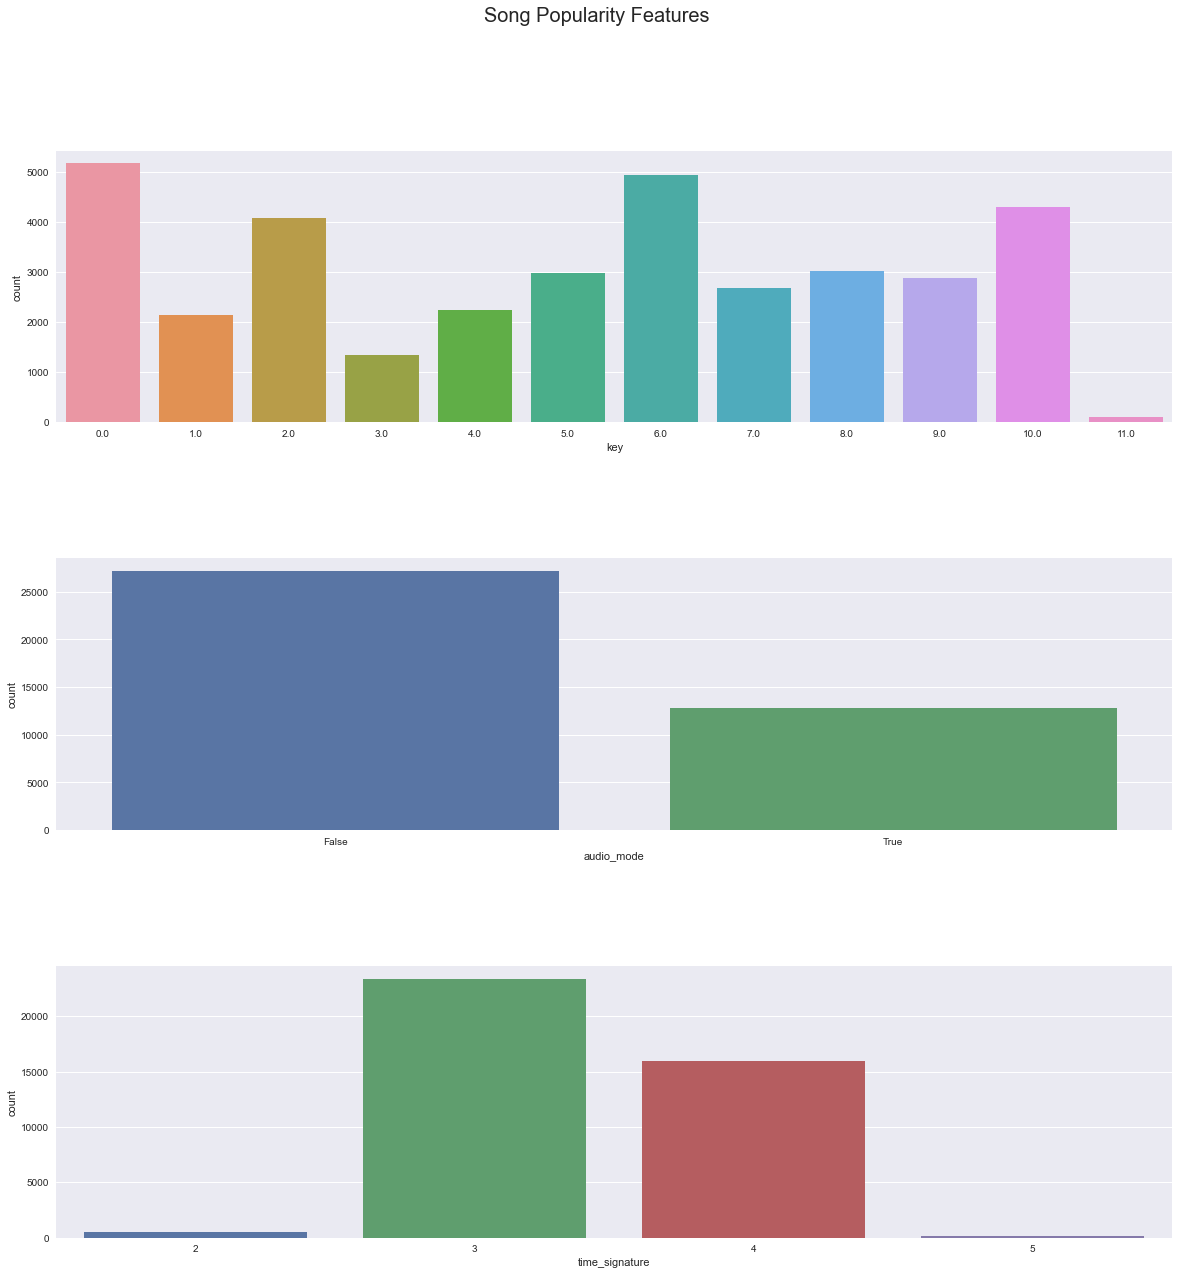

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
fig.suptitle("Song Popularity Features", size=20)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.countplot(data=train,x="key", label="key", ax=axes[0])
sns.countplot(data=train,x="audio_mode", label="audio_mode", ax=axes[1])
sns.countplot(data=train,x="time_signature", label="time_signature", ax=axes[2])

plt.show();

We find:
- Our initial impressions of the data types have argely been confirmed: `audio_mode` is a boolean feature, and `time_signature` and `key` are ordinal or categorical ones (or integerl although a better understanding of those musical concepts would certainly benefit from some domain knowledge)
- A number of features are bounded between 0 and 1: `acousticness`, `danceability`, `energy`, liveliness`, `speechiness`, and `audio_valence`.
- The feature `loudness` looks like it refer to the decibel scale.
- The distribution of `instrumentalness` is heavily right-skewed, and even after a log transform, this feature doesn't look very well-behaved. This might need a bit more work.


### 4.2 Target: Song Popularity


On to the target itself. We figured out that `song_popularity` is a binary feature, and thus we can express it as boolean. Here we plot a barchart, and create a scale of percentages, rather than absolute values.


<AxesSubplot:title={'center':'Song Popularity Distribution'}>

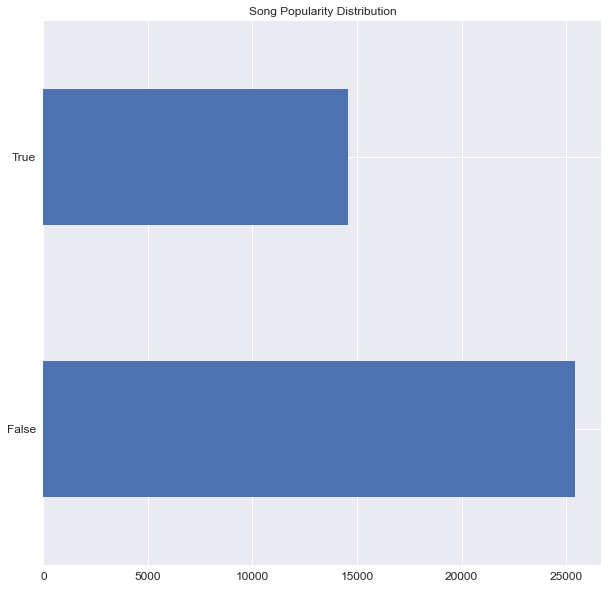

In [17]:
train.song_popularity.value_counts().plot(kind="barh", figsize=(10, 10), title="Song Popularity Distribution", fontsize=12)

We find:
- There is a slight imbalance in the target distribution: a bit more than 60/40. Not super imbalanced, but something to keep in mind.